이것이 코딩테스트다!

---
# 1. Greedy

## 1-1. 큰 수의 법칙

In [40]:
# n개의 수들을 m번 더하여 가장 큰 수를 만드는데, 특정 인덱스의 수가 연속해서 k번 초과하여 더할 수 없다.

# n, m, k = map(int, input().split())
# ls = list(map(int, input().split()))

n, m, k = 5, 8, 3
ls = [2,4,5,4,6]

In [25]:
# case1
# 여기서 사용하는 수는 가장큰 2개의 수가 필요하다. -> 정렬해서 큰 수 2개 추출
# 포문으로 가장 큰 수 3번 더하고, 두번째로 큰 수 1번 더하고를 반복하여 m이 0일 때까지 진행.

ls.sort()
first = ls[n-1]
second = ls[n-2]


sum = 0
while True:
    for i in range(k): # k번 연속 first를 더함
        sum += first
        m -= 1
        if m == 0:
            break
    
    sum += second # 3번 더한 뒤 second를 한 번 더함
    m -= 1
    if m == 0:
        break

print(sum)

46


In [39]:
# case2 : n이 상당히 클 때는 수열이 반복되는 특성을 활용해서 풀기
ls.sort()
first = ls[n-1]
second = ls[n-2]

count = m//(k+1)*k + m%(k+1) # 가장 큰 수가 더해지는 횟수

result = 0 
result += count*first
result += (m-count)*second

print(result)

46


## 1-2. 숫자 카드 게임

In [50]:
# 높은 숫자를 뽑는 게임이지만, 선택한 행에서 가장 낮은 숫자를 뽑아야하기에 최소 숫자가 가장 큰 행을 골라야한다.
n, m = 2, 4
data1 = [7,3,1,8]
data2 = [3,3,3,4]

In [53]:
# case1

data = [data1,data2]
result = min(data[0]) # 임시

for i in range(n):
    if result <= min(data[i]):
        result = min(data[i])

print(result)

3


In [54]:
# case2 : min 사용

n, m = map(int, input().split())

result = 0
for i in range(n):
    data = list(map(int, input().split()))
    min_value = min(data)
    result = max(result, min_value)

print(result)

3


## 1-3. 1이 될 때까지

In [58]:
n, k = 25, 5

In [59]:
# 1) n에서 1을 뺀다.
# 2) n이 k로 나누어질 때 나눈다.
# 1,2 연산을 통해 1로 만들 때 최소 연산 횟수를 구하라.

## if문을 통해 n이 k로 나누어 떨어질 때(n%k가 0일 때) 나누고 아니면 -1 해라. 이를 count!
## 나누기를 많이 해서 n을 최대한 많이 줄이자. 나누기 우선으로 if문 작성(이는 k가 2이상일 때 최적해라는 정당성을 가짐)

result=0
while True:
    if n%k == 0:
        n = n//k
    
    else:
        n -= 1
    
    result += 1
    if n == 1:
        break

print(result)

2


---
# 2. 구현

## 2-1. 상하좌우

In [61]:
# 입력데이터
N = 5
data = ['R', 'R', 'R', 'U', 'D', 'D']

# (1,1)에서 시작
x, y = 1, 1

In [67]:
for i in range(len(data)):
    if data[i] == 'R':
        y+=1
        if y>N:
            y-=1
    elif data[i] == 'L':
        y-=1
        if y<N:
            y+=1
    elif data[i] == 'U':
        x-=1
        if x<N:
            x+=1
    else:
        x+=1
        if x>N:
            x-=1
print(x,y)

3 4


In [19]:
# case2 : x,y 좌표 리스트 활용해서

# (y, x)
n = 5
y, x = 1, 1

# L, R, U, D
dx = [0,0,-1,1]
dy = [-1,1,0,0]

# data = list(map(int, input().split()))
data = ['R', 'R', 'R', 'U', 'D', 'D']
move_type = ['L', 'R', 'U', 'D']

for i in data:
    for j in range(4):
        if i == move_type[j]:
            nx = x + dx[j]
            ny = y + dy[j]
        
    if (nx > n) | (ny > n) | (nx < 1) | (ny < 1):
        continue
    x = nx
    y = ny

print(x, y)

3 4


## 2-2. 시각

In [22]:
N = 5
counts = 0
for i in range(N+1): # 24시, 60초분은 존재하지 x. 00시, 00초분이 있을뿐
    for j in range(60):
        for k in range(60):
            sum_str = str(i)+str(j)+str(k)
            if '3' in sum_str:
                counts +=1


print(counts)

11475


In [68]:
# 00:00:00 ~ N:59:59 사이의 시각 중 3이 포함되는 경우의 수
# N : 0~23

# 완전 탐색 알고리즘!!
# 24*60*60 개의 경우의 수를 3중 반복문으로 돌리면서 counts!

In [72]:
n = int(input())
count = 0
for i in range(n+1):
    for j in range(60):
        for k in range(60):
            if '3' in str(i)+str(j)+str(k):
                count += 1

print(count)

11475


## 2-3. 왕실의 나이트
> 아스키코드 변환 : ord()  
> 문자로 변환 : chr()

In [96]:
ls_row = [1,2,3,4,5,6,7,8] # y
ls_col = ['a','b','c','d','e','f','g','h'] # x

# 움직이는 경우의 수 4*2
# 위
m00 = [-1,-2] # 위로 두 칸 왼쪽 한 칸(x,y)
m01 = [1,-2]
# 오른
m10 = [2,-1]
m11 = [2,1]
# 아래
m20 = [1,2]
m21 = [-1,2]
# 왼
m30 = [-2,-1]
m31 = [-2,1]

ls_move = [m00,m01,m10,m11,m20,m21,m30,m31]

In [98]:
data = 'c2' # ord('a')-96 = 1
counts = 0

x = ord(data[0])-96
y = int(data[1])

for i in ls_move:
    if (x+i[0]>=1) & (x+i[0]<=8) & (y+i[1]>=1) & (y+i[1]<=8):
        counts += 1

print(counts)

6


In [108]:
n=3
m=2
[[0]*m for _ in range(n)]

[[0, 0], [0, 0], [0, 0]]

## 2-4. 게임개발
- 쥰내 어려움
- 아래는 틀린 코드

In [121]:
n, m = map(int, input().split())
x,y,direction = map(int, input().split())

# 방문했을 때 1로 기록할 map 생성(0으로 초기화)
d = [[0]*m for _ in range(n)]
d[x][y] = 1 # 현재위치 방문처리 / x가 세로, y가 가로

# 전체 맵 정보 입력받기
array = []
for _ in range(n):
    array.append(list(map(int, input().split())))

# 북동남서 정의(0,1,2,3)
dx = [-1,0,1,0]
dy = [0,1,0,-1]

# 왼쪽 회전
def turn_left():
    global direction
    direction -= 1
    if direction == -1:
        direction = 3


# 시뮬레이션 시작
counts = 1 # 방문할 때마다 카운트
turn_time = 0 # 4번 돌게되면 사면을 다 돌았다는 것. 이동할 때마다 리셋

while True:
    # 왼쪽 이동 좌표
    turn_left()
    nx = x + dx[direction]
    ny = y + dy[direction]
    
    if d[nx][ny]==0 & array[nx][ny]==0: # 회전하고 전진했을 때 가보지 않은 칸이고 육지면 이동
        x = nx
        y = ny
        d[nx][ny] = 1 # 방문체크
        counts += 1 # 방문 카운트
        turn_time = 0
        continue
    
    else: # 가본 곳이거나 바다면 왼쪽 턴을 하는데 이를 count!
        turn_time += 1
    
    # 네 방향 모두 갈 수 없는 경우
    if turn_time == 4:
        # 뒤로 이동 좌표
        nx = x - dx[direction]
        ny = y - dy[direction]
        
        if array[nx][ny] == 0: # 뒤가 육지면 이동
            x = nx
            y = ny
        
        else: # 뒤가 바다면 stop
            break
        turn_time = 0


print(counts)

16


---
# 3. DFS/BFS

In [189]:
# deque : 큐 라이브러리
from collections import deque
queue = deque()
queue.append(1) # 왼쪽부터 삽입
queue.append(2)
queue.append(3)
queue

deque([1, 2, 3])

In [190]:
print(queue.popleft()) # 왼쪽부터 삭제(FIFO), stack은 (right)pop
print(queue.popleft())
print(queue.popleft())
queue

1
2
3


deque([])

In [193]:
# 이렇게 큐가 다 비어있으면 조건문에 넣었을 때, false로 인식하고 실행되지 않음
# 이를 이용해서 while문에 넣어 queue가 빌 때까지 명령문을 반복할 수 있음.
if queue:
    print(1)

while queue:
    print(1)
    queue.popleft()

## 3-1. DFS예제
> ### stack 동작원리 & 재귀 함수 이용

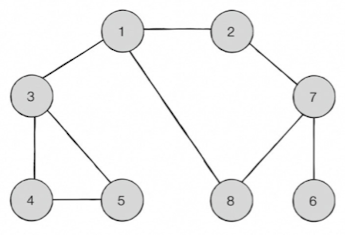

In [154]:
# 그래프는 인접 리스트 방식으로 연결된 노드만 적어준다.
graph = [[], # 0번 노드는 없다
        [2,3,8], # 1번 노드와 연결된 노드 번호
        [1,7],
        [4,5],
        [3,5],
        [3,4],
        [7],
        [2,6,8],
        [1,7]]

# 방문했는지 체크하는 변수
check = [0]*len(graph)

# 재귀함수
def DFS(graph, check, v): # 그래프정보, 방문정보, 시작노드
    check[v] = 1
    print(v, end=' ') # 현재 위치 출력(방문을 안하면 재귀되어 출력되도록)
    
    for i in graph[v]: # 모든 노드는 연결되어 있으니, v노드와 인접한 노드만 for문 돌려서 방문하면 전체를 결국 다 돈다.
    # 인접노드를 순서대로 스택에 넣는데 아래에 재귀함수가 있으니 처음 들어간 인접노드의 인접노드가 그 위로 쌓여 깊이 탐색이 구현된다.
        if check[i] == 0: # 방문을 안했으면
            DFS(graph, check , i)
                
DFS(graph, check, 1)

1 2 7 6 8 3 4 5 

## 3-2. BFS예제
> ### queue 동작원리 & deque 라이브러리 이용

In [196]:
from collections import deque

# 그래프는 인접 리스트 방식으로 연결된 노드만 적어준다.
graph = [[], # 0번 노드는 없다
        [2,3,8], # 1번 노드와 연결된 노드 번호
        [1,7],
        [4,5],
        [3,5],
        [3,4],
        [7],
        [2,6,8],
        [1,7]]

# 방문했는지 체크하는 변수
check = [0]*len(graph)

# 큐 생성
queue = deque()

# BFS 함수 정의
def BFS(graph, check, v):
    check[v] = 1
    queue.append(v)
    
    while queue:
        a = queue.popleft()
        print(a, end=' ') # pop과 동시에 추가하는데, BFS에서 삭제된다는 의미는 현재 방문 위치라는 뜻. so 여기서 print
        
        for i in graph[a]: # pop된 a와 연결된 노드를 append
            if check[i] == 0: # 가보지 않은 곳이면!
                queue.append(i)
                check[i] = 1


BFS(graph, check, 1)

1 2 3 8 7 4 5 6 

## 3-3. 음료수 얼려 먹기(DFS예제)

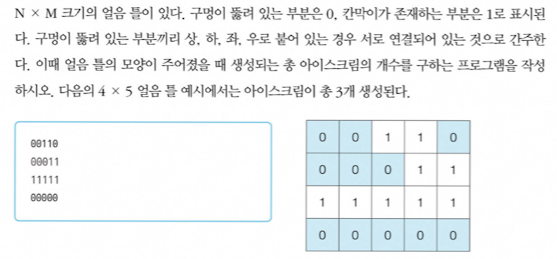

얼음틀은 N*M 크기이고, 이 안에 있는 얼음 덩어리 개수를 세어야한다.  
그 방법으로 DFS를 사용할 수 있다. 왜냐.  

1) 방문하지 않는 칸이 있으면 True를 리턴하는 함수를 만들어주고, 그 함수를 (1,1), (1,2),,,(n,m)까지 하나씩
실행시킬 때 True를 리턴하는 경우를 세주면 끝이다.

2) 다만 여기서. return True 앞에 위아래옆으로 DFS로 방문하게하는 재귀함수를 넣어준다.
그렇게해서 각 얼음들의 왼쪽위의 칸을 만났을 때 그 얼음 전체에 방문을 기록하게 되면
다음에 그 얼음을 방문할 시 False를 리턴받게 된다.

* 결과적으로 각 얼음의 왼쪽위를 만났을 때 True를 리턴받고, 연결된0을 1로 바꾸게 만드는 DFS방식(재귀함수)를 사용하면 된다.
추가적으로 x,y좌표 문제에선 벗어 났을 때의 예외를 처리하는 if문이 있어야함.

> 이렇게 하나씩 쭈욱 전염, 장악해 나가는 문제에서는 DFS를 재귀함수로 사용하는게 좋다.  
> 참고론 이 문제에선 방문했다는 것을 체크할 변수가 필요 없다.

In [ ]:
# 참고
list(map(int,str(N))) # : 정수 N의 각 자리 숫자를 리스트로 묶어줌
# 그래서 input값 간에 space가 없으면 .split() 적지 않으면 됨.

In [218]:
# 맵 크기
N, M = 4, 5

# 맵 정보 받기
# graph = []
# for _ in range(N):
#     graph.append(list(map(int, input())))
graph = [[0,0,1,1,0],
        [0,0,0,1,1],
        [1,1,1,1,1],
        [0,0,0,0,0]]

# 각 노드를 방문할 DFS함수 생성
def dfs(x, y):
    # 입력값이 맵을 벗어날 때 예외처리(종료조건, 예외조건은 메인 실행문 보다 먼저.)
    if (x<0) or (x>N-1) or (y<0) or (y>M-1): # N,M보다 크거나 '같으면' 안됨(range를 사용해서 0~(N-1)까지 쓰니깐 바보야..)
    # if x <= -1 or x >= N or y <= -1 or y >= M:
        return False # 함수에서 break는 return
    
    # 이동
    if graph[x][y] == 0: # 방문하지 않았으면 방문처리
        graph[x][y] = 1
        
        # 상하좌우 위치도 모두 재귀적으로 호출해서 연속적으로 연결되어 있는 0노드를 1로 전염시킴
        dfs(x,y-1)
        dfs(x,y+1)
        dfs(x-1,y)
        dfs(x+1,y)
        return True # 각 얼음의 첫 조각을 방문했을 때 true 리턴하여 함수 끝냄
    else:
        return False

# 각 칸을 하나씩 방문하며 얼음 갯수(True) count
result = 0
for i in range(N):
    for j in range(M):
        if dfs(i,j) == True:
            result += 1


print(result)

3


## 3-4. 미로 탈출(어려움)

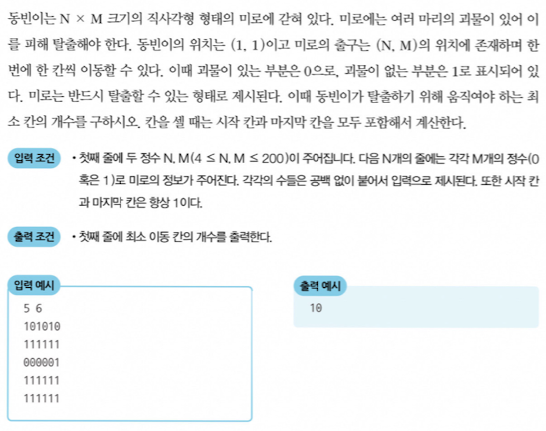

- 이문제는 BFS응용 문제이다.
- BFS는 인접한 노드를 하나씩 방문하며 방문체크를 해나가는데, 이렇게 방문하지 않는 인접한 노드를 하나씩 방문하며 노드값을 거리값으로 채워 준다면
- (1,1)과 다른 노드 사이의 최소 거리값을 얻을 수 있다.

In [230]:
from collections import deque

N, M = 5, 6
graph = [[1,0,1,0,1,0],
        [1,1,1,1,1,1],
        [0,0,0,0,0,1],
        [1,1,1,1,1,1],
        [1,1,1,1,1,1]]

# for i in range(n):
#     graph.append(list(map(int, input())))

# 네 방향
ls_move = [0,1,2,3] # 상하좌우
dx = [-1,1,0,0]
dy = [0,0,-1,1]

# BFS 함수
def BFS(x,y):
    queue = deque()
    queue.append((x,y))
    
    # 큐가 빌 때까지
    while queue:
        x, y = queue.popleft()
        for i in ls_move:
            nx = x + dx[i]
            ny = y + dy[i]
            
            if (nx<0) or (nx>N-1) or (ny<0) or (ny>M-1): # 예외1 : 범위초과
                continue
            
            if graph[nx][ny]==0: # 예외2 : 벽인경우
                continue
            
            # 처음 방문하는 경우에만 최단거리 기록
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y]+1 # 최단거리 기록(움직일 노드에 '현재노드+1'기록)
                queue.append((nx,ny)) # 큐에 담기
    
    return graph[N-1][M-1] # 가장 오른쪽 아래 노도의 최단거리 반환


print(BFS(0,0))

10


---
# 4. 정렬
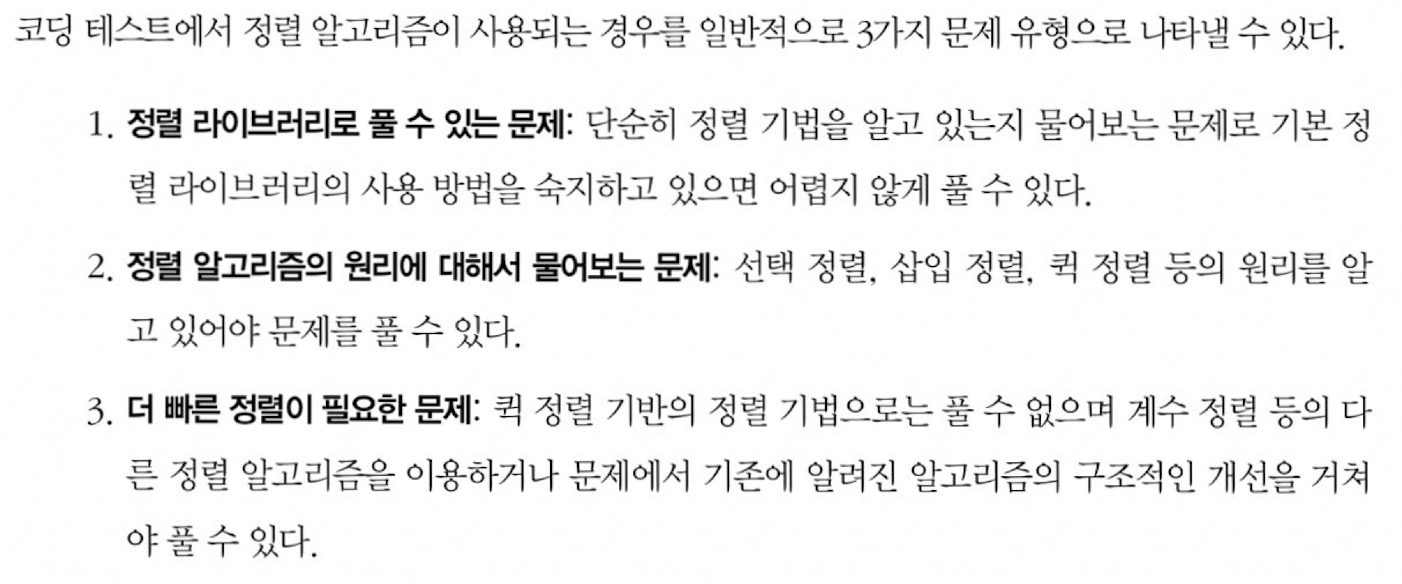

In [233]:
# 등차수열의 합 공식
# n(2a+(n-1)d)/2
# 여기서 a는 초항, d는 공차
# 따라서 1~N까지의 합은 n(n+1)/2이다.

# 다르게 생각하면 1~N까지의 합은 (1+N)+(2+N-1)+(3+N-2)...이고 이 계산이 전체의 절반만큼 이루어 지니 (1+N)*(n/2)이다.

## 4.1 선택 정렬
- 시간 복잡도는 O(n2)
- (N-1)+(N-2)....+1 : N(N-1)/2

In [245]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(len(array)-1):
    min_index = i # 가장 작은 원소의 인덱스를 담을 변수. 초기값은 현재 위치(기준)
    
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]: # 현재보다 작은게 있으면 변수에 인덱스 저장하여 나중에 젤 작은 애들 swap
            min_index = j
    
    array[i], array[min_index] = array[min_index], array[i] # swap


print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
array = [7,5,9,0,3,1,6,2,4,8]
# 선택정렬

for i in range()

In [232]:
# swap case1 - 파이썬의 특권!
a,b = 1,2
a,b = b,a
print(a,b)

# swap case2
a=1
b=2

temp = a
a = b
b = temp
print(a,b)

2 1
2 1


## 4.2 삽입 정렬
- 가장 작은걸 선택해서 앞에서부터 차례대로 정렬하는 선택 정렬과 다르게,
- 앞쪽에 정렬된 숫자들 중 자신의 위치를 찾아 들어간다.
- 자신의 위치를 찾는 방법은. 앞쪽숫자랑 하나씩 비교하면서 자기보다 작은 숫자가 나오면 그 때 자리가 자기 자리다.
- 이렇게 자기 위치를 찾아 삽입하는 방법을 삽입 정렬이라고 한다.

> 시간복잡도는 선택정렬과 같이 O(n2)이지만, 현재 리스트의 데이터가 거의 정렬되어 있는 상태라면 매우 빠르게 동작하여 최선의 경우 O(n)의 시간 복잡도를 가진다.
- 그래서 거의 정렬되어 있는 상태로 데이터가 주어지면 다른 정렬 알고리즘보다 유리할 수 있다.

In [235]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(1, len(array)): # 처음부터 끝까지 하나씩 확인(1~(n-1)임. 0은 하지않음. 이미 정렬된 상태라고 봄)
    for j in range(i, 0, -1): # 자기 앞쪽의 숫자와 비교하며(현재index부터 1까지)
        if array[j] < array[j-1]: # 앞숫자가 자기보다 크면 swap한다.(자기보다 작은 숫자가 나올 때까지)
            array[j], array[j-1] = array[j-1], array[j]
        else: # 앞쪽 숫자가 자기보다 작으면 stop
            break


print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 4.3 퀵정렬
- 1) 전통적 방법(난이도 있음)
- 2) 장점을 살린 방법(코드이해는 쉽지만, 시간 좀 걸림)
- 3) 이수지 교수님 방법(1,2의 중간 난이도) - divide and quanqure 방법

> 고급 정렬은 시간복잡도가 평균 O(nlogn)으로 선택,삽입보다 빠르다.
> 퀵정렬은 최선의 경우O(n), 최악의 경우 O(n2)이다.
- 최선의 경우 : 피벗에 따라 array가 딱 절반씩 분할될 때.(데이터가 8개일 때 3번만 분할되는 경우)
- 최악의 경우 : 이미 정렬되어 있는 array면 왼쪽부터 하나씩 차례대로 피벗이 되니. 피벗 선정하는 횟수 n번 x 각 비교횟수 n번
> 삽입 정렬은 이미 데이터가 정렬되어 있을 때 빠르다고 하였다. 그 반대로 퀵정렬은 정렬되어있을 때 젤 느리다. 이를 고려하여 알고리즘을 선정.

In [249]:
# case1. 전통 퀵 정렬 - 어렵..
array = [5,7,9,0,3,1,6,2,4,8]

def quick_sort(array, start, end):
    if start >= end: # 데이터가 1개이거나(=), 이상한 호출(>) stop처리
        return
    
    pivot = start # 피벗은 첫 번쨰 원소
    left = start + 1
    right = end
    
    while (left <= right): # 교차가 안일어나는 선에서
        while (left <= end) and (array[left] <= array[pivot]): # 왼쪽에서부터 피벗보다 큰 데이터를 찾기
            left += 1
        while (right > start) and (array[right] >= array[pivot]): # 오른쪽에서부터 피벗보다 작은 데이터를 찾기
            right -= 1
        
        if left > right: # 교차 되었으면(같은 의미로 right아래로는 pivot보다 큰 애들이 없다. 그래서 바꿔줄 큰 애가 pivot이 된다.) & 아래 실행하고 While 탈출
            array[right], array[pivot] = array[pivot], array[right]  # 작은데이터와 피벗 swap
        else: # 아니면 그냥 큰 것과 작은것 swap
            array[left], array[right] = array[right], array[left]
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행.(swap으로 right가 현재 pivot위치이니 그 앞뒤로 재귀적으로 정렬!)
    quick_sort(array, start, right-1)
    quick_sort(array, right+1, end)

quick_sort(array, 0, len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [250]:
# case2. 장점을 살린 방법
array = [5,7,9,0,3,1,6,2,4,8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(array) <= 1:
        return array

    pivot = array[0] # 피벗은 첫 번째 원소
    tail = array[1:] # 피벗을 제외한 리스트
    
    left_side = [x for x in tail if x<=pivot] # 분할된 왼쪽 부분(같은 수가 존재할 수 있으니 한쪽에만 등호를 넣어주자)
    right_side = [x for x in tail if x>pivot] # 분할된 오른쪽 부분
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬을 수행하고, 전체 리스트를 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [257]:
# case3. 이수지 교수님 방법 - 왜 내림차순이지...???
array = [5,7,9,0,3,1,6,2,4,8]

def partition(array, start, end):
    # array[start, end+1] 원소들을 array[start]를 기준으로 양쪽으로 재배치하고
    # array[start]가 자리한 위치를 리턴한다.
    
    pivot = array[start]
    i = start+1 # i는 피벗보다 큰 숫자 중 첫번째 인덱스를 의미. 아래에서 j를 증가시키면서 j가 피벗보다 작으면, 피벗에서 젤 가까운 큰숫자 i랑 위치를 바꿈
    # j가 피벗보다 작으면 i와 j가 같이 +1이고
    # j가 피벗보다 크면 j만 +1해서 다음 숫자와 피벗을 비교하도록한다.
    
    for j in range(start+1, end+1):
        if pivot <= array[j]: # 피벗보다 큰 애가 있으면 swap
            array[i], array[j] = array[j], array[i]
            i += 1
    array[i-1], array[start] = array[start], array[i-1] # 피벗보다 큰 첫번째 숫자 인덱스가 i이니 피벗의 인덱스는 i-1
    return i-1


def quick_sort(array, start, end):
    if start < end:
        q = partition(array, start, end)
        
        quick_sort(array,start,q-1)
        quick_sort(array,q+1, end)

quick_sort(array, 0, len(array)-1)
array

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## 4.4 계수정렬
- 0에서부터 가장큰수까지 길이의(n+1) 리스트를 만들고,
- 각 숫자가 array에 몇번있는지 count한 뒤에
- 리스트를 0에서부터 max숫자까지 count한 만큼 출력하면 정렬.

In [29]:
array = [7,5,9,0,3,1,6,2,9,1,4,8,0,5,2]

ls_counts = [0]*(max(array)+1) # 0~max(N+1개)

for i in array:
    ls_counts[i] += 1

for i in range(len(ls_counts)):
    for _ in range(ls_counts[i]):
        print(i, end=' ')

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

## 4.5 정렬 라이브러리
- 파이썬 정렬 라이브러리 : sorted(array) -> 매개변수로 key, reverse 존재
- 리스트 내장 함수 : array.sort() -> 매개변수로 key, reverse 존재(같음)  
보통 이런 정렬방법은 퀵정렬과 병햡정렬에 기반하여 작동된다. 병합정렬은 최악의 경우에도 O(nlog)를 유지해서 이를 많이 사용하기도 하지만, 퀵정렬에 기반한 알고리즘도 요즘 최악의 경우도 O(Nlog)를 만족한다.

In [2]:
# (튜플를 가지는 리스트에서) 키를 사용해서 정렬하는 방법 : sorted의 key 매개변수(안에 함수가 들어가야함)
array = [('바나나', 2), ('사과', 5), ('당근', 3)]

def setting(data):
    return data[1] # 튜플의 2번째 원소(정렬기준) 반환

result = sorted(array, key = setting)
result

[('바나나', 2), ('당근', 3), ('사과', 5)]

## 4.6.실전 문제
### 4.6.1 : 위에서 아래로


In [6]:
N = int(input())
ls = list()

for i in range(N):
    data = int(input())
    ls.append(data)

# case1
ls = sorted(ls, reverse=True)

# case2
# ls.sort()
# ls.reverse()

for i in ls:
    print(i, end=' ')

27 15 12 

### 4.6.2 : 성적이 낮은 순서로 학생 출력하기

In [9]:
N = int(input())
ls = list()

for i in range(N):
    name, index = input().split() # index가 문자열임에 주의
    ls.append((name, int(index)))

# key를 사용해 Index를 기준으로 정렬
def sort_key(data):
    return data[1]

ls = sorted(ls, key=sort_key) # 업데이트

# case2 : 함수정의 없이 lambda로 바로 사용
# ls = sorted(array, key=lambda student: student[1])

# Print
for i in ls:
    print(i[0], end=' ')

이순신 홍길동 

### 4.6.3 : 두 배열의 원소 교체(한쪽이 크도록)

In [14]:
N, K = 5, 3
ls_a = [1,2,5,4,3]
ls_b = [5,5,6,6,5]

# 정렬을 해서 A에서 제일 작은 것과, 정렬을해서 B에서 젤 큰 것을 swap 해줘야함.

ls_a = sorted(ls_a) # 젤 작은 것 부터
ls_b = sorted(ls_b, reverse=True) # 젤 큰 것 부터

for i in range(K): # '최대' K만큼 교체
    # swap
    if ls_a[i] < ls_b[i]:
        ls_a[i], ls_b[i] = ls_b[i], ls_a[i]
    else:
        break

# 합
print(sum(ls_a))

26


---
# 5. 이진탐색

## 5.1 순차탐색 소스코드
- 특정 데이터를 찾기 위해 앞에서부터 하나씩 차례대로 확인하는 방법
- 장점 : 시간만 충분하다면 항상 원하는 원소를 찾을 수 있다.

In [1]:
def sequential_search(n, target, array):
    for i in range(n):
        if array[i] == target:
            return i+1 # 현재 위치 반환(1부터 카운트를 하니 +1)

print("생성할 원소 개수를 입력한 다음 한칸 띄고 찾을 문자열을 입력하세요.")
n, target = input().split()
n = int(n)

print("문자열을 입력하세요")
array = input().split()


print(sequential_search(n, target, array))

생성할 원소 개수를 입력한 다음 한칸 띄고 찾을 문자열을 입력하세요.
문자열을 입력하세요
3


## 5.2 이진탐색 소스코드(재귀적 방법)
- 반으로 쪼개면서 탐색하기
- 이미 정렬된 데이터에만 사용 가능
- 변수 3개 : 시작점, 끝점, 중간점

In [2]:
def binary_search(array, target, start, end):
    if start > end: # start(왼쪽)가 end(오른쪽)을 넘으면 찾는게 array에 없다는 뜻.
        return None
    
    mid = (start + end) // 2 # 중간점 계산. 나머지 버려.
    
    if array[mid] == target: # 찾은 경우 중간점 인덱스 반환
        return mid
    
    elif array[mid] > target: # 찾고자하는 값이 중간값보다 작으니 왼쪽 확인
        return binary_search(array, target, start, mid-1)
    
    else: # 찾고자하는 값이 중간값보다 크니 오른쪽 확인
        return binary_search(array, target, mid+1, end)

# n(원소의 개수)과 target(찾고자 하는 문자열)을 입력받기
n, target = list(map(int, input().split()))
# 전체 원소 입력받기
array = list(map(int, input().split()))


result = binary_search(array, target, 0, n-1)
if result == None:
    print("원소가 존재하지 않습니다.")
else:
    print(result+1)

4


## 5.3 이진탐색 소스코드(반복문 사용)

In [ ]:
def binary_search(array, target, start, end):
    while start <= end:
        mid = (start+end)//2
        
        if array[mid] == target:
            return mid
        elif array[mid] > target: # 찾는게 더 작으니 왼쪽
            end = mid-1 ##### 재귀함수를 여기서 호출하는 재귀방법과 다르게 end를 옮겨주며 while에 의해 반복됌
        else:
            start = mid+1
    return None # 위 while문에서 mid가 retrun이 안됐다는 말은 못 찾았다는 것. so, None을 리턴한다.

n, target = list(map(int, input().split()))
array = list(map(int, input().split()))

result = binary_search(array, target, 0, n-1)
if result == None:
    print("원소가 존재하지 않습니다.")
else:
    print(result+1)